### Handwritten Number Recognition Using ANN with Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
help(keras.datasets)

Help on package tensorflow.keras.datasets in tensorflow.keras:

NAME
    tensorflow.keras.datasets - Public API for tf.keras.datasets namespace.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    c:\users\lenovo\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\keras\datasets\__init__.py




In [4]:
mnist = keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 56s 5us/step


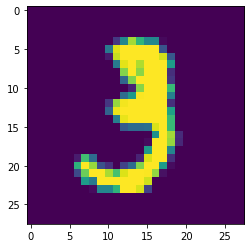

In [15]:
plt.imshow(X_train_full[10])

In [16]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
np.shape(X_train_full)

(60000, 28, 28)

#### Normalization

In [18]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

#### Data Separation to Three Categories (Validation, Test, and Training)

In [21]:
X_valid, X_train = X_train_n[:10000], X_train_n[10000:]
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test_n

#### Create The Model Architecture

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential()
# First, we make an Input Layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Second, we make two Hidden Layer with 300 Rel-U Neurons and 100 Rel-U Neurons
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
# Third, we make an Output Layer for 10 different categories (from 0 to 9)
model.add(keras.layers.Dense(10, activation="softmax")) 
# NOTE : we use softmax because it's multiclass clasification

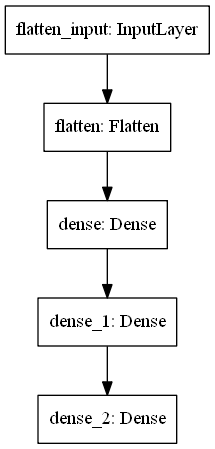

In [24]:
import pydot
keras.utils.plot_model(model)

In [36]:
weights, biases = model.layers[3].get_weights()
''' Argument [1] in model.layers represent array in between input layer and first hidden layer
    Argument [2] in model.layers represent array in between first hidden layer and second hidden layer
    Argument [3] in model.layers represent array in between second hidden layer and output layer
'''

' Argument [1] in model.layers represent array in between input layer and first hidden layer\n    Argument [2] in model.layers represent array in between first hidden layer and second hidden layer\n    Argument [3] in model.layers represent array in between second hidden layer and output layer\n'

In [37]:
weights.shape

(100, 10)

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

In [41]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_handwritten.h5",save_best_only=True)

In [42]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [43]:
model_hist = model.fit(X_train,y_train,epochs=100,
                       validation_data=(X_valid,y_valid),
                       callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6455 - accuracy: 0.8338 - val_loss: 0.3361 - val_accuracy: 0.9016
Epoch 2/100
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3034 - accuracy: 0.9134 - val_loss: 0.2658 - val_accuracy: 0.9249
Epoch 3/100
1563/1563 [==============================] - 30s 19ms/step - loss: 0.2505 - accuracy: 0.9280 - val_loss: 0.2398 - val_accuracy: 0.9287
Epoch 4/100
1563/1563 [==============================] - 29s 19ms/step - loss: 0.2155 - accuracy: 0.9385 - val_loss: 0.2077 - val_accuracy: 0.9411
Epoch 5/100
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1887 - accuracy: 0.9462 - val_loss: 0.1845 - val_accuracy: 0.9475
Epoch 6/100
1563/1563 [==============================] - 32s 20ms/step - loss: 0.1674 - accuracy: 0.9517 - val_loss: 0.1671 - val_accuracy: 0.9519
Epoch 7/100
1563/1563 [==============================] - 30s 19ms/step - loss: 0.1502 - accuracy: 0.9571 - val_loss: 0

In [44]:
model = keras.models.load_model("early_stop_handwritten.h5")

In [45]:
mse = model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0721 - accuracy: 0.0991


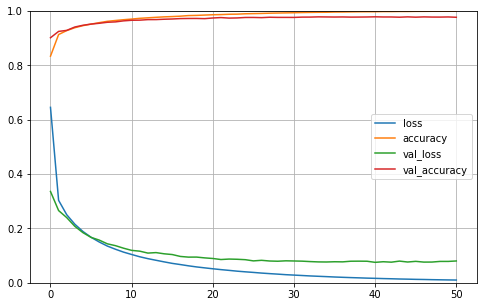

In [55]:
import pandas as pd

pd.DataFrame(model_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
X_new = X_test[:4]

In [57]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, 0], dtype=int64)

In [60]:
class_names= [str(i) for i in range(10)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [61]:
np.array(class_names)[y_pred]

array(['7', '2', '1', '0'], dtype='<U1')

AxesImage(54,36;334.8x217.44)


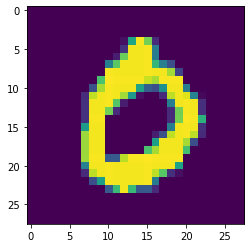

In [66]:
print(plt.imshow(X_test[3]))

KELAR BROHHH T_T